# Cat Vs Dog Classifier

## About Dataset

- __The train folder contains images of cat and dogs.The train folder contains 25,000 images of dogs and cats.There are no duplicate images.__
- __The test folder contains 12500 images of cats and dogs.__
- __Each image has been preprocessed to 200x300 pixels.__
- __test Dataset in unlabelled.__<br>
URL for dataset : https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras import layers
from tensorflow.contrib.keras import models
import tensorflow.contrib.keras as keras
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras.preprocessing.image import save_img
import PIL
from PIL import Image
import os
from tqdm import tqdm

Using TensorFlow backend.


In [3]:
path_train = '/home/kushagra/Desktop/My_Projects/catvsdog/preprocessed_images_train/'
path_test = '/home/kushagra/Desktop/My_Projects/catvsdog/preprocessed_images_test/'

In [4]:
train = '/home/kushagra/Desktop/My_Projects/catvsdog/train/'
test = '/home/kushagra/Desktop/My_Projects/catvsdog/test1/'
list_of_images_tr = os.listdir(train)
list_of_images_eval = os.listdir(test)

## CNN for cats vs dogs classifier

In [5]:
model = models.Sequential()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(300, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 397, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 198, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 195, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 97, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 94, 64)        65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 21, 128)      

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
datagen = IDG(rescale=1./255)

In [10]:
train_generator = datagen.flow_from_directory(directory = path_train,target_size=(300, 400),classes = ['cat','dog'],
                                              class_mode='binary',batch_size=32,shuffle=True)

validation_generator = datagen.flow_from_directory(directory = path_test,target_size=(300, 400),
                                                   classes = ['cat','dog'],class_mode='binary',batch_size=32,
                                                   shuffle=True)

Found 19999 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


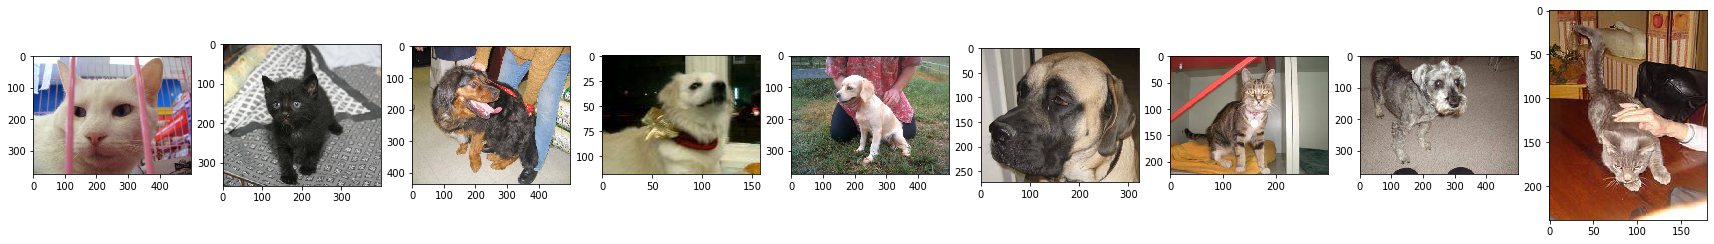

In [20]:
plt.figure(1,figsize=(30,20))
for count,filename in enumerate(list_of_images_tr[500:509]):
    image = plt.imread(train+filename)
    plt.subplot(190+count+1)
    plt.imshow(image)
plt.show()

In [21]:
model.fit_generator(train_generator,steps_per_epoch=625, epochs=10,
                    validation_data = validation_generator,validation_steps=157)

Epoch 1/10
625/625 [==============================] - 220s 353ms/step - loss: 0.5982 - acc: 0.6567 - val_loss: 0.5411 - val_acc: 0.7342
Epoch 2/10
625/625 [==============================] - 214s 342ms/step - loss: 0.4000 - acc: 0.8193 - val_loss: 0.3304 - val_acc: 0.8568
Epoch 3/10
625/625 [==============================] - 215s 344ms/step - loss: 0.3088 - acc: 0.8676 - val_loss: 0.3586 - val_acc: 0.8458
Epoch 4/10
625/625 [==============================] - 224s 359ms/step - loss: 0.2433 - acc: 0.8978 - val_loss: 0.2561 - val_acc: 0.8932
Epoch 5/10
625/625 [==============================] - 219s 350ms/step - loss: 0.1955 - acc: 0.9198 - val_loss: 0.2725 - val_acc: 0.8810
Epoch 6/10
625/625 [==============================] - 231s 369ms/step - loss: 0.1522 - acc: 0.9391 - val_loss: 0.2336 - val_acc: 0.9080
Epoch 7/10
625/625 [==============================] - 228s 365ms/step - loss: 0.1238 - acc: 0.9517 - val_loss: 0.2775 - val_acc: 0.8938
Epoch 8/10
625/625 [============================

In [23]:
model.evaluate(x=X_test,y=Y_test)

500/500 [==============================] - 2s 3ms/sample - loss: 0.7145 - acc: 0.5720


[0.7144793934822082, 0.572]

In [24]:
from keras.models import load_model

In [25]:
model.save('/home/kushagra/Desktop/My_Projects/CatsVsDogs_model_saved/catVsDogs.h5')

In [43]:
path_for_test = '/home/kushagra/Desktop/My_Projects/catvsdog/test1/'
list_test_images = os.listdir(path_for_test)

In [40]:
test_generator = datagen.flow_from_directory(directory = path_for_test,target_size=(300, 400),
                                              classes = ['cat','dog'],
                                              class_mode='binary',batch_size=40,shuffle=True)

Found 410 images belonging to 2 classes.


In [108]:
del model

## Loading and Testing Model

In [3]:
from tensorflow import keras
import os

In [5]:
model =keras.models.load_model('/home/kushagra/Desktop/My_Projects/CatsVsDogs_model_saved/CatVsDogs.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
def test():
    x = np.zeros((10,300,400,3),dtype=np.int32)
    for i in range(0,10):
        random_image = np.random.randint(1,201)
        image = plt.imread(path_for_test+str(random_image)+'.jpg')
        x[i,:,:,:] = image
    return x

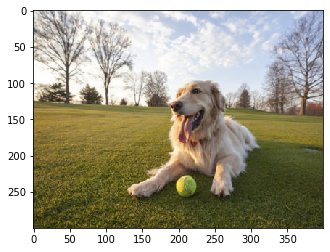

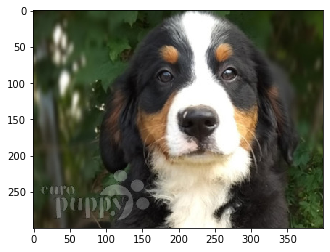

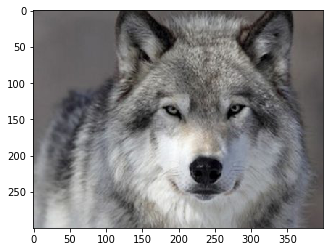

array([1, 1, 1])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.zeros((3,300,400,3),dtype=np.int32)
path = '/home/kushagra/Desktop/My_Projects/catvsdog/sphynx/'
for i in range(0,3):
    image = plt.imread(path+str(i+1)+'.jpg')
    x[i,:,:,:] = image
plt.imshow(x[0,:,:,:])
plt.show()
plt.imshow(x[1,:,:,:])
plt.show()
plt.imshow(x[2,:,:,:])
plt.show()
model.predict_classes(x/255.0,batch_size=2)